## **Supplementary notebook to create multiplots for 13C flux comparisons for version in publication**

By Christina Schenk

Tested on biodesign_3.7 kernel on jprime

### Multiplots
This notebook generates multiplots for comparing the predictions from notebook F-J to the 13C flux observations for R. opacus cultures growing with glucose and phenol. The data was published in [Yoneda (2016)](https://academic.oup.com/nar/article/44/5/2240/2465306) and in [Henson (2018)](https://www.sciencedirect.com/science/article/pii/S1096717618300910).
                                            

### Method: 
<ol>
<li>Load data for predictions and observations from files</li>
    <li>Generate multiplot for comparing 13C flux observations vs. predictions for Glucose</li>
    <li>Generate multiplot for comparing 13C flux observations vs. predictions for Phenol</li>
</ol>



In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sys

### **1. Load data from observations and predictions (FBA, pFBA, SPOT, E-Flux2)**

In [13]:
#Glucose:
Glucose_SPOT_CPM_13c_fluxes_data = pd.read_csv('../../13C_flux_data/obspredfluxes_Glucose_SPOT_CPM.csv', index_col=0)
Glucose_EFLUX2_CPM_13c_fluxes_data = pd.read_csv('../../13C_flux_data/obspredfluxes_Glucose_EFLUX2_CPM.csv', index_col=0)
Glucose_FBA_pFBA_fluxes_data = pd.read_csv('../../13C_flux_data/13C_glucose_flux_and_FBA_pFBA_data.csv', index_col=0)

#Phenol:
Phenol_SPOT_CPM_13c_fluxes_data = pd.read_csv('../../13C_flux_data/obspredfluxes_Phenol_SPOT_CPM.csv', index_col=0)
Phenol_EFLUX2_CPM_13c_fluxes_data = pd.read_csv('../../13C_flux_data/obspredfluxes_Phenol_EFLUX2_CPM.csv', index_col=0)
Phenol_FBA_pFBA_fluxes_data = pd.read_csv('../../13C_flux_data/13C_phenol_flux_and_FBA_pFBA_data.csv', index_col=0)

##### **Set plot output directory**

In [17]:
output_dir = '../Plots/CPM/'

##### **Import utility functions code**

In [18]:
SourceDir = '../../src'
sys.path.append(SourceDir)
from utils import *
#from plot import *

### **2. Multiplot for Glucose Comparison of 13C Observations vs. Predictions (SPOT, E-Flux2, FBA, pFBA)**

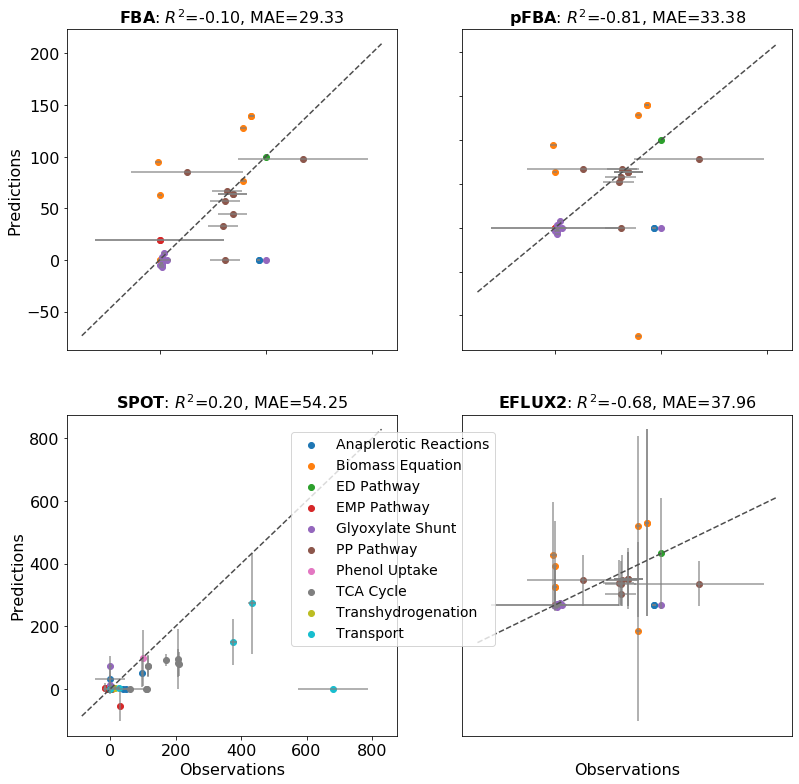

In [19]:
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 13))

####FBA WT#########
#ax[0,0].plot(ax[0,0].get_xlim(), ax[0,0].get_ylim(), ls="--", c=".3", label='_nolegend_')
method = 'FBA'
strain = 'WT'
substrate = 'glucose'
FBA_fluxes = Glucose_FBA_pFBA_fluxes_data
pathway_list = sorted(list(set(FBA_fluxes['Pathway'])))
for pathway in pathway_list:                          
    pathway_df = FBA_fluxes[FBA_fluxes['Pathway'] == pathway]

    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' Value'])
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        simulated_std_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' std Value'])
    measured_std_list = list(pathway_df['90% Confidence Upper Bound']-pathway_df['Flux'])

    if pathway == 'Pentose Phosphate Pathway':
        pathway = 'PP Pathway'
    sc2 = ax[0,0].scatter(measured_flux_list, simulated_flux_list, label='_nolegend_')
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        ax[0,0].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list], yerr=[1.9*std for std in simulated_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
    else: 
        ax[0,0].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
        
predicted1 = FBA_fluxes.loc[~FBA_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']), str(method)+' '+ str(strain) + ' ' + 'Value']
observed1 =  FBA_fluxes.loc[~FBA_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']),'Flux']

predicted2 = FBA_fluxes.loc[:, str(method)+' '+ str(strain) + ' ' + 'Value']
observed2 =  FBA_fluxes.loc[:,'Flux']

r2_scikit_1 = r2_score(observed1,predicted1)
r2_scikit_2 = r2_score(observed2,predicted2)

mae_score_1 = np.round(mae_func(observed1, predicted1),2)
mae_score_2 = np.round(mae_func(observed2, predicted2),2)

if substrate=='phenol':
    ax[0,0].set_title(r''+ r"$\bf{" + str(method) + "}$"  + ': ' + f"$R^2$={r2_scikit_2:.2F} ({r2_scikit_1:.2F}$^\star$), MAE={mae_score_2} ({mae_score_1}$^\star$)", fontsize=16) #star: without 'ATP -> ATP.ext', 'NADH <-> NADPH'
else:
    ax[0,0].set_title(r''+ r"$\bf{" + str(method) + "}$" + ': '+ f"$R^2$={r2_scikit_2:.2F}, MAE={mae_score_2}", fontsize=16)#r''+str(sub)+  ' 13C MFA vs. '+ str(method) + ' Fluxes for ' +linename+ '\n' + f"$R^2$={r2_scikit_2:.2F} (all reactions)", fontsize=16)#, MAE={mae_score}, MSE = {mse}, RMSE={rmse}

####pFBA WT#########
method = 'pFBA'
strain = 'WT'
substrate = 'glucose'
pFBA_fluxes = Glucose_FBA_pFBA_fluxes_data
pathway_list = sorted(list(set(pFBA_fluxes['Pathway'])))
for pathway in pathway_list:                          
    pathway_df = pFBA_fluxes[pFBA_fluxes['Pathway'] == pathway]

    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' Value'])
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        simulated_std_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' std Value'])
    measured_std_list = list(pathway_df['90% Confidence Upper Bound']-pathway_df['Flux'])

    if pathway == 'Pentose Phosphate Pathway':
        pathway = 'PP Pathway'
    sc2 = ax[0,1].scatter(measured_flux_list, simulated_flux_list, label='_nolegend_')
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        ax[0,1].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list], yerr=[1.9*std for std in simulated_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
    else: 
        ax[0,1].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
        
predicted1 = pFBA_fluxes.loc[~pFBA_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']), str(method)+' '+ str(strain) + ' ' + 'Value']
observed1 =  pFBA_fluxes.loc[~pFBA_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']),'Flux']

predicted2 = pFBA_fluxes.loc[:, str(method)+' '+ str(strain) + ' ' + 'Value']
observed2 =  pFBA_fluxes.loc[:,'Flux']

r2_scikit_1 = r2_score(observed1,predicted1)
r2_scikit_2 = r2_score(observed2,predicted2)

mae_score_1 = np.round(mae_func(observed1, predicted1),2)
mae_score_2 = np.round(mae_func(observed2, predicted2),2)

if substrate=='phenol':
    ax[0,1].set_title(r''+ r"$\bf{" + str(method) + "}$"  + ': ' + f"$R^2$={r2_scikit_2:.2F} ({r2_scikit_1:.2F}$^\star$), MAE={mae_score_2} ({mae_score_1}$^\star$)", fontsize=16) #star: without 'ATP -> ATP.ext', 'NADH <-> NADPH'
else:
    ax[0,1].set_title(r''+ r"$\bf{" + str(method) + "}$" + ': '+ f"$R^2$={r2_scikit_2:.2F}, MAE={mae_score_2}", fontsize=16)#r''+str(sub)+  ' 13C MFA vs. '+ str(method) + ' Fluxes for ' +linename+ '\n' + f"$R^2$={r2_scikit_2:.2F} (all reactions)", fontsize=16)#, MAE={mae_score}, MSE = {mse}, RMSE={rmse}

####SPOT WT#########
obspred_fluxes = Glucose_SPOT_CPM_13c_fluxes_data
method = 'SPOT'
strain = 'WT'

pathway_list = sorted(list(set(obspred_fluxes['Pathway'])))
for pathway in pathway_list:                          
    pathway_df = obspred_fluxes[obspred_fluxes['Pathway'] == pathway]

    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' Value'])
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        simulated_std_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' std Value'])
    measured_std_list = list(pathway_df['90% Confidence Upper Bound']-pathway_df['Flux'])

    if pathway == 'Pentose Phosphate Pathway':
        pathway = 'PP Pathway'
    sc = ax[1,0].scatter(measured_flux_list, simulated_flux_list, label=pathway)
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        ax[1,0].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list], yerr=[1.9*std for std in simulated_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
    else: 
        ax[1,0].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
        
predicted1 = obspred_fluxes.loc[~obspred_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']), str(method)+' '+ str(strain) + ' ' + 'Value']
observed1 =  obspred_fluxes.loc[~obspred_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']),'Flux']

predicted2 = obspred_fluxes.loc[:, str(method)+' '+ str(strain) + ' ' + 'Value']
observed2 =  obspred_fluxes.loc[:,'Flux']

r2_scikit_1 = r2_score(observed1,predicted1)
r2_scikit_2 = r2_score(observed2,predicted2)

mae_score_1 = np.round(mae_func(observed1, predicted1),2)
mae_score_2 = np.round(mae_func(observed2, predicted2),2)

if substrate=='phenol':
    ax[1,0].set_title(r''+ r"$\bf{" + str(method) + "}$"  + ': ' + f"$R^2$={r2_scikit_2:.2F} ({r2_scikit_1:.2F}$^\star$), MAE={mae_score_2} ({mae_score_1}$^\star$)", fontsize=16) #star: without 'ATP -> ATP.ext', 'NADH <-> NADPH'
else:
    ax[1,0].set_title(r''+ r"$\bf{" + str(method) + "}$" + ': '+ f"$R^2$={r2_scikit_2:.2F}, MAE={mae_score_2}", fontsize=16)#r''+str(sub)+  ' 13C MFA vs. '+ str(method) + ' Fluxes for ' +linename+ '\n' + f"$R^2$={r2_scikit_2:.2F} (all reactions)", fontsize=16)#, MAE={mae_score}, MSE = {mse}, RMSE={rmse}
    
####EFLUX2 WT#########
obspred_fluxes = Glucose_EFLUX2_CPM_13c_fluxes_data
method = 'EFLUX2'
strain = 'WT'

pathway_list = sorted(list(set(obspred_fluxes['Pathway'])))
for pathway in pathway_list:                          
    pathway_df = obspred_fluxes[obspred_fluxes['Pathway'] == pathway]

    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' Value'])
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        simulated_std_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' std Value'])
    measured_std_list = list(pathway_df['90% Confidence Upper Bound']-pathway_df['Flux'])

    if pathway == 'Pentose Phosphate Pathway':
        pathway = 'PP Pathway'
    sc = ax[1,1].scatter(measured_flux_list, simulated_flux_list, label='_nolegend_')
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        ax[1,1].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list], yerr=[1.9*std for std in simulated_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
    else: 
        ax[1,1].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
        
predicted1 = obspred_fluxes.loc[~obspred_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']), str(method)+' '+ str(strain) + ' ' + 'Value']
observed1 =  obspred_fluxes.loc[~obspred_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']),'Flux']

predicted2 = obspred_fluxes.loc[:, str(method)+' '+ str(strain) + ' ' + 'Value']
observed2 =  obspred_fluxes.loc[:,'Flux']

r2_scikit_1 = r2_score(observed1,predicted1)
r2_scikit_2 = r2_score(observed2,predicted2)

mae_score_1 = np.round(mae_func(observed1, predicted1),2)
mae_score_2 = np.round(mae_func(observed2, predicted2),2)

if substrate=='phenol':
    ax[1,1].set_title(r''+ r"$\bf{" + str(method) + "}$"  + ': ' + f"$R^2$={r2_scikit_2:.2F} ({r2_scikit_1:.2F}$^\star$), MAE={mae_score_2} ({mae_score_1}$^\star$)", fontsize=16) #star: without 'ATP -> ATP.ext', 'NADH <-> NADPH'
else:
    ax[1,1].set_title(r''+ r"$\bf{" + str(method) + "}$" + ': '+ f"$R^2$={r2_scikit_2:.2F}, MAE={mae_score_2}", fontsize=16)#r''+str(sub)+  ' 13C MFA vs. '+ str(method) + ' Fluxes for ' +linename+ '\n' + f"$R^2$={r2_scikit_2:.2F} (all reactions)", fontsize=16)#, MAE={mae_score}, MSE = {mse}, RMSE={rmse}
# Dashed line
for i in range(0,nrows):
    for j in range(0,ncols):
        x = np.linspace(*ax[i,j].get_xlim())
        ax[i,j].plot(x, x, ls="--", c=".3", label='_nolegend_')

# set labels
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
matplotlib.rcParams['font.size'] = 16
for axi in ax.flat:
    axi.set(xlabel='Observations', ylabel='Predictions')#, labelsize=16)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for axi in ax.flat:
    axi.label_outer()
line_labels = sorted(["",""])
for pathway in pathway_list:
     line_labels.append(str(pathway))
plt.figlegend(fontsize=14, loc="lower center", bbox_to_anchor=(.42, .14))

# Save figure
plt.savefig(str(output_dir)+'Plot_Glucose_13cwithstd_multplot'+str(method)+'_'+str(substrate)+'_'+str(strain)+'.svg')
plt.savefig(str(output_dir)+'Plot_Glucose_13cwithstd_multplot'+str(method)+'_'+str(substrate)+'_'+str(strain)+'.png')

### **3. Multiplot for Phenol Comparison of 13C Observations vs. Predictions (SPOT, E-Flux2, FBA, pFBA)**

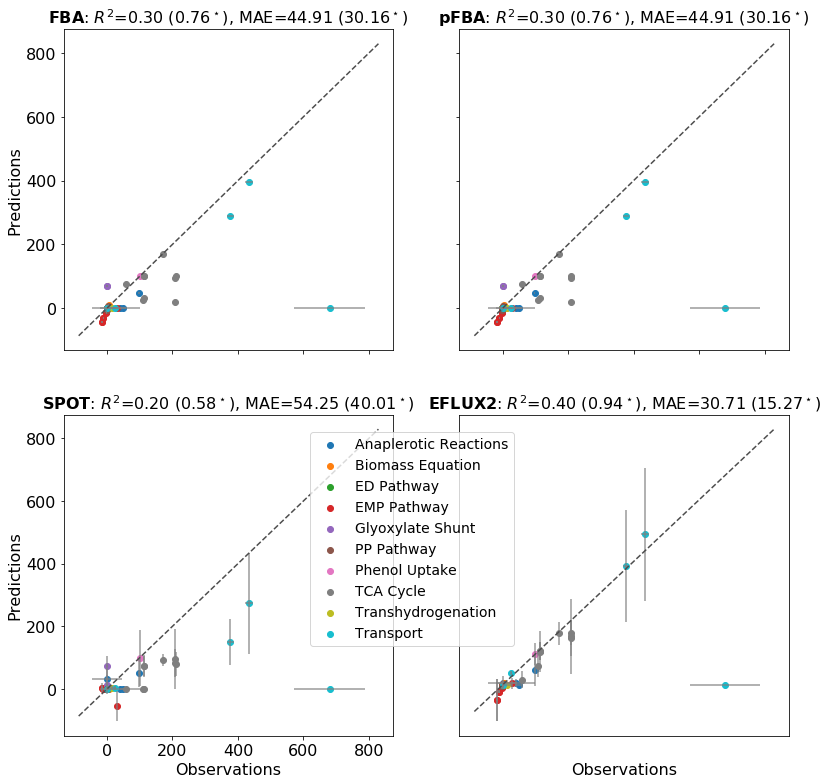

In [20]:
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 13))
####FBA WT#########
#ax[0,0].plot(ax[0,0].get_xlim(), ax[0,0].get_ylim(), ls="--", c=".3", label='_nolegend_')
method = 'FBA'
strain = 'WT'
substrate = 'phenol'
FBA_fluxes = Phenol_FBA_pFBA_fluxes_data
pathway_list = sorted(list(set(FBA_fluxes['Pathway'])))
for pathway in pathway_list:                          
    pathway_df = FBA_fluxes[FBA_fluxes['Pathway'] == pathway]

    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' Value'])
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        simulated_std_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' std Value'])
    measured_std_list = list(pathway_df['90% Confidence Upper Bound']-pathway_df['Flux'])

    if pathway == 'Pentose Phosphate Pathway':
        pathway = 'PP Pathway'
    sc2 = ax[0,0].scatter(measured_flux_list, simulated_flux_list, label='_nolegend_')
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        ax[0,0].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list], yerr=[1.9*std for std in simulated_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
    else: 
        ax[0,0].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
        
predicted1 = FBA_fluxes.loc[~FBA_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']), str(method)+' '+ str(strain) + ' ' + 'Value']
observed1 =  FBA_fluxes.loc[~FBA_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']),'Flux']

predicted2 = FBA_fluxes.loc[:, str(method)+' '+ str(strain) + ' ' + 'Value']
observed2 =  FBA_fluxes.loc[:,'Flux']

r2_scikit_1 = r2_score(observed1,predicted1)
r2_scikit_2 = r2_score(observed2,predicted2)

mae_score_1 = np.round(mae_func(observed1, predicted1),2)
mae_score_2 = np.round(mae_func(observed2, predicted2),2)

if substrate=='phenol':
    ax[0,0].set_title(r''+ r"$\bf{" + str(method) + "}$"  + ': ' + f"$R^2$={r2_scikit_2:.2F} ({r2_scikit_1:.2F}$^\star$), MAE={mae_score_2} ({mae_score_1}$^\star$)", fontsize=16) #star: without 'ATP -> ATP.ext', 'NADH <-> NADPH'
else:
    ax[0,0].set_title(r''+ r"$\bf{" + str(method) + "}$" + ': '+ f"$R^2$={r2_scikit_2:.2F}, MAE={mae_score_2}", fontsize=16)#r''+str(sub)+  ' 13C MFA vs. '+ str(method) + ' Fluxes for ' +linename+ '\n' + f"$R^2$={r2_scikit_2:.2F} (all reactions)", fontsize=16)#, MAE={mae_score}, MSE = {mse}, RMSE={rmse}

####pFBA WT#########
method = 'pFBA'
strain = 'WT'
pFBA_fluxes = Phenol_FBA_pFBA_fluxes_data
pathway_list = sorted(list(set(pFBA_fluxes['Pathway'])))
for pathway in pathway_list:                          
    pathway_df = pFBA_fluxes[pFBA_fluxes['Pathway'] == pathway]

    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' Value'])
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        simulated_std_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' std Value'])
    measured_std_list = list(pathway_df['90% Confidence Upper Bound']-pathway_df['Flux'])

    if pathway == 'Pentose Phosphate Pathway':
        pathway = 'PP Pathway'
    sc2 = ax[0,1].scatter(measured_flux_list, simulated_flux_list, label='_nolegend_')
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        ax[0,1].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list], yerr=[1.9*std for std in simulated_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
    else: 
        ax[0,1].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
        
predicted1 = pFBA_fluxes.loc[~pFBA_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']), str(method)+' '+ str(strain) + ' ' + 'Value']
observed1 =  pFBA_fluxes.loc[~pFBA_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']),'Flux']

predicted2 = pFBA_fluxes.loc[:, str(method)+' '+ str(strain) + ' ' + 'Value']
observed2 =  pFBA_fluxes.loc[:,'Flux']

r2_scikit_1 = r2_score(observed1,predicted1)
r2_scikit_2 = r2_score(observed2,predicted2)

mae_score_1 = np.round(mae_func(observed1, predicted1),2)
mae_score_2 = np.round(mae_func(observed2, predicted2),2)

if substrate=='phenol':
    ax[0,1].set_title(r''+ r"$\bf{" + str(method) + "}$"  + ': ' + f"$R^2$={r2_scikit_2:.2F} ({r2_scikit_1:.2F}$^\star$), MAE={mae_score_2} ({mae_score_1}$^\star$)", fontsize=16) #star: without 'ATP -> ATP.ext', 'NADH <-> NADPH'
else:
    ax[0,1].set_title(r''+ r"$\bf{" + str(method) + "}$" + ': '+ f"$R^2$={r2_scikit_2:.2F}, MAE={mae_score_2}", fontsize=16)#r''+str(sub)+  ' 13C MFA vs. '+ str(method) + ' Fluxes for ' +linename+ '\n' + f"$R^2$={r2_scikit_2:.2F} (all reactions)", fontsize=16)#, MAE={mae_score}, MSE = {mse}, RMSE={rmse}

####SPOT WT#########
obspred_fluxes = Phenol_SPOT_CPM_13c_fluxes_data
method = 'SPOT'
strain = 'WT'

pathway_list = sorted(list(set(obspred_fluxes['Pathway'])))
for pathway in pathway_list:                          
    pathway_df = obspred_fluxes[obspred_fluxes['Pathway'] == pathway]

    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' Value'])
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        simulated_std_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' std Value'])
    measured_std_list = list(pathway_df['90% Confidence Upper Bound']-pathway_df['Flux'])

    if pathway == 'Pentose Phosphate Pathway':
        pathway = 'PP Pathway'
    sc = ax[1,0].scatter(measured_flux_list, simulated_flux_list, label=pathway)
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        ax[1,0].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list], yerr=[1.9*std for std in simulated_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
    else: 
        ax[1,0].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
        
predicted1 = obspred_fluxes.loc[~obspred_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']), str(method)+' '+ str(strain) + ' ' + 'Value']
observed1 =  obspred_fluxes.loc[~obspred_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']),'Flux']

predicted2 = obspred_fluxes.loc[:, str(method)+' '+ str(strain) + ' ' + 'Value']
observed2 =  obspred_fluxes.loc[:,'Flux']

r2_scikit_1 = r2_score(observed1,predicted1)
r2_scikit_2 = r2_score(observed2,predicted2)

mae_score_1 = np.round(mae_func(observed1, predicted1),2)
mae_score_2 = np.round(mae_func(observed2, predicted2),2)

if substrate=='phenol':
    ax[1,0].set_title(r''+ r"$\bf{" + str(method) + "}$"  + ': ' + f"$R^2$={r2_scikit_2:.2F} ({r2_scikit_1:.2F}$^\star$), MAE={mae_score_2} ({mae_score_1}$^\star$)", fontsize=16) #star: without 'ATP -> ATP.ext', 'NADH <-> NADPH'
else:
    ax[1,0].set_title(r''+ r"$\bf{" + str(method) + "}$" + ': '+ f"$R^2$={r2_scikit_2:.2F}, MAE={mae_score_2}", fontsize=16)#r''+str(sub)+  ' 13C MFA vs. '+ str(method) + ' Fluxes for ' +linename+ '\n' + f"$R^2$={r2_scikit_2:.2F} (all reactions)", fontsize=16)#, MAE={mae_score}, MSE = {mse}, RMSE={rmse}
    
####EFLUX2 WT#########
obspred_fluxes = Phenol_EFLUX2_CPM_13c_fluxes_data
method = 'EFLUX2'
strain = 'WT'

pathway_list = sorted(list(set(obspred_fluxes['Pathway'])))
for pathway in pathway_list:                          
    pathway_df = obspred_fluxes[obspred_fluxes['Pathway'] == pathway]

    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' Value'])
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        simulated_std_list = list(pathway_df[str(method) + ' ' +  str(strain) + ' std Value'])
    measured_std_list = list(pathway_df['90% Confidence Upper Bound']-pathway_df['Flux'])

    if pathway == 'Pentose Phosphate Pathway':
        pathway = 'PP Pathway'
    sc = ax[1,1].scatter(measured_flux_list, simulated_flux_list, label='_nolegend_')
    if str(method) + ' ' +  str(strain) + ' std Value' in pathway_df.columns:
        ax[1,1].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list], yerr=[1.9*std for std in simulated_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
    else: 
        ax[1,1].errorbar(
            measured_flux_list, simulated_flux_list, xerr=[std1 for std1 in measured_std_list],
                ecolor="gray", ls='none',
                alpha=0.8, label='_nolegend_')
        
predicted1 = obspred_fluxes.loc[~obspred_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']), str(method)+' '+ str(strain) + ' ' + 'Value']
observed1 =  obspred_fluxes.loc[~obspred_fluxes['Reaction'].isin(['ATP -> ATP.ext', 'NADH <-> NADPH']),'Flux']

predicted2 = obspred_fluxes.loc[:, str(method)+' '+ str(strain) + ' ' + 'Value']
observed2 =  obspred_fluxes.loc[:,'Flux']

r2_scikit_1 = r2_score(observed1,predicted1)
r2_scikit_2 = r2_score(observed2,predicted2)

mae_score_1 = np.round(mae_func(observed1, predicted1),2)
mae_score_2 = np.round(mae_func(observed2, predicted2),2)

if substrate=='phenol':
    ax[1,1].set_title(r''+ r"$\bf{" + str(method) + "}$"  + ': ' + f"$R^2$={r2_scikit_2:.2F} ({r2_scikit_1:.2F}$^\star$), MAE={mae_score_2} ({mae_score_1}$^\star$)", fontsize=16) #star: without 'ATP -> ATP.ext', 'NADH <-> NADPH'
else:
    ax[1,1].set_title(r''+ r"$\bf{" + str(method) + "}$" + ': '+ f"$R^2$={r2_scikit_2:.2F}, MAE={mae_score_2}", fontsize=16)#r''+str(sub)+  ' 13C MFA vs. '+ str(method) + ' Fluxes for ' +linename+ '\n' + f"$R^2$={r2_scikit_2:.2F} (all reactions)", fontsize=16)#, MAE={mae_score}, MSE = {mse}, RMSE={rmse}
# Dashed line
for i in range(0,nrows):
    for j in range(0,ncols):
        x = np.linspace(*ax[i,j].get_xlim())
        ax[i,j].plot(x, x, ls="--", c=".3", label='_nolegend_')

# set labels
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
matplotlib.rcParams['font.size'] = 16
for axi in ax.flat:
    axi.set(xlabel='Observations', ylabel='Predictions')#, labelsize=16)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for axi in ax.flat:
    axi.label_outer()
plt.figlegend(fontsize=14, loc="lower center", bbox_to_anchor=(.44, .14))

# Save figure
plt.savefig(str(output_dir)+'Plot_Phenol_13cwithstd_multplot'+str(method)+'_'+str(substrate)+'_'+str(strain)+'.svg')
plt.savefig(str(output_dir)+'Plot_Phenol_13cwithstd_multplot'+str(method)+'_'+str(substrate)+'_'+str(strain)+'.png')